In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts column to list type - Allows for .explode()
df['job_skills'] = df['job_skills'].apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list) 

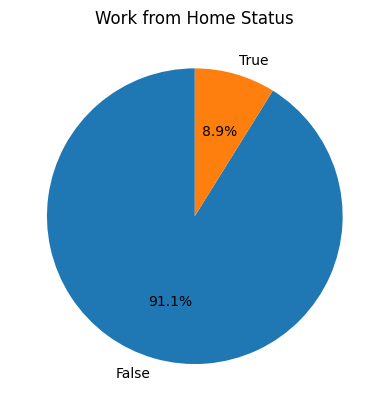

In [9]:
df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%')
plt.title('Work from Home Status')
plt.ylabel('')
plt.show()


In [8]:
df[['job_work_from_home','job_no_degree_mention','job_health_insurance']]

,job_work_from_home,job_no_degree_mention,job_health_insurance
0,False,False,False
1,False,False,False
2,False,False,False
3,False,True,False
4,False,False,False
...,...,...,...
785736,False,False,False
785737,False,False,False
785738,False,False,False
785739,False,False,False


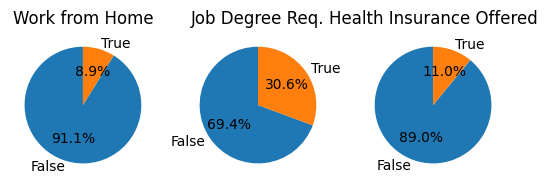

In [11]:
# Plotting the pie charts of the 3 columns above on 1 figure:
fig, ax = plt.subplots(1, 3) # 1 row, 3 columns

# Define dictionary with Column Name and Header Name - will be used in loop
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), startangle = 90, autopct = '%1.1f%%', labels = ['False', 'True'])
    ax[i].set_title(title)

plt.show()
